## Test Notebook

In [28]:
# All imports
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# get raw Dataset
data = pd.read_csv('data/raw_dataset/heart.csv')

display(data.head())



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


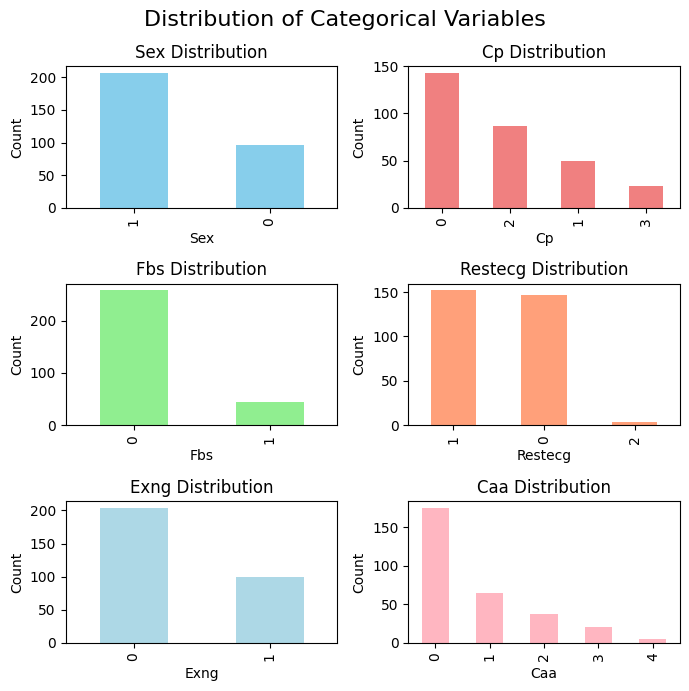

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [30]:
# Display the distribution of categorical variables

# Categorical variables to visualize and their respective colors
categorical_vars = [
    ('sex', 'skyblue'),
    ('cp', 'lightcoral'),
    ('fbs', 'lightgreen'),
    ('restecg', 'lightsalmon'),
    ('exng', 'lightblue'),
    ('caa', 'lightpink')
]

# Create subplots for each categorical variable
fig, axs = plt.subplots(3, 2, figsize=(7, 7))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Loop through each categorical variable and plot its distribution with the specified color
for i, (var, color) in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    data[var].value_counts().plot(kind='bar', ax=axs[row, col,], color=color)
    axs[row, col].set_title(f'{var.capitalize()} Distribution')
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

data.describe()

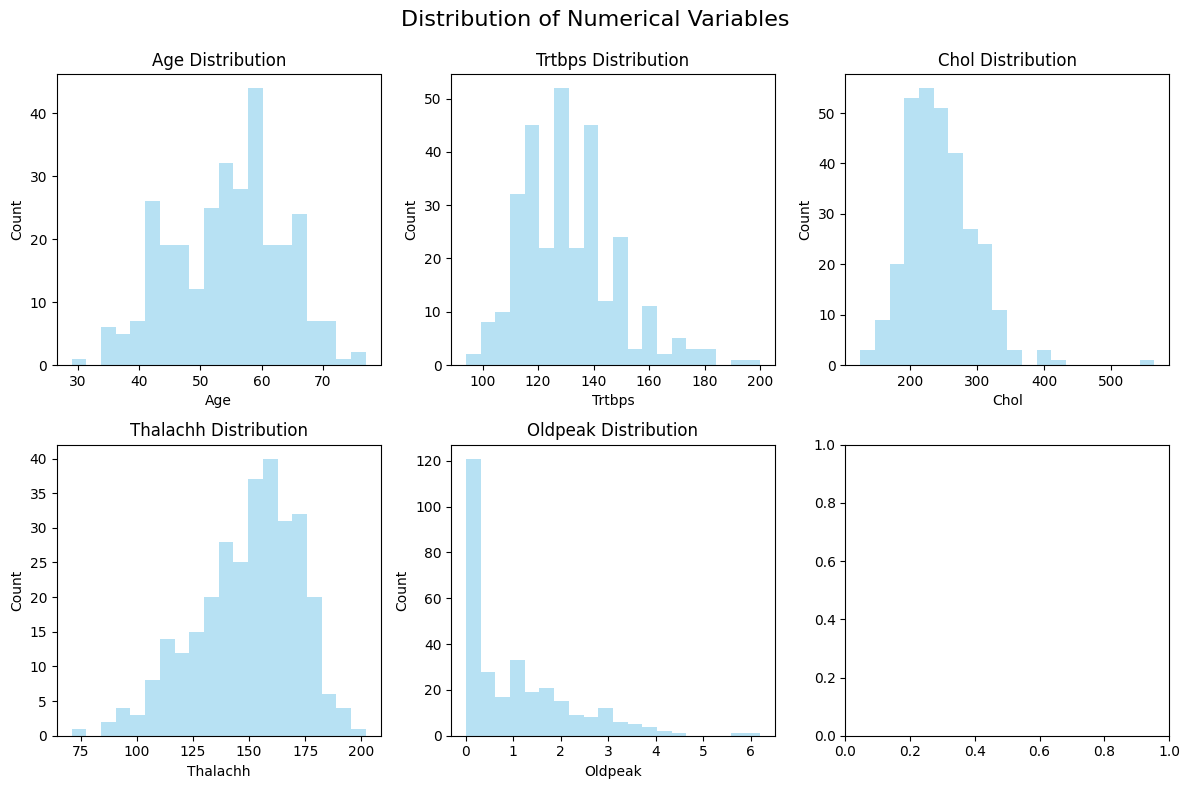

In [31]:
# List of numerical variables
numerical_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Create subplots for each numerical variable
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_vars):
    row = i // 3
    col = i % 3

    # Plot the distribution of the numerical variable
    axs[row, col].hist(data[var], bins=20, color='skyblue', alpha=0.6)
    axs[row, col].set_title(f'{var.capitalize()} Distribution')
    axs[row, col].set_xlabel(var.capitalize())
    axs[row, col].set_ylabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## Try to scale data:

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the features (X) and the target variable (y)
X = data.drop(columns=['output'])  # Features (all columns except 'output')
y = data['output']  # Target variable

# Select categorical and numerical columns
X_categorical = X[['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa']]
X_numerical = X.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa'])

# Data Scaling for numerical values
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_numerical)
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=X_numerical.columns)

# Concatenate scaled numerical and categorical data
X_scaled = pd.concat([X_scaled_numerical_df, X_categorical], axis=1)

display(X_scaled.head())
display(X.head())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


,age,trtbps,chol,thalachh,oldpeak,slp,thall,sex,cp,fbs,restecg,exng,caa
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-2.274579,-2.148873,1,3,1,0,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-2.274579,-0.512922,1,2,0,1,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0.976352,-0.512922,0,1,0,0,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.976352,-0.512922,1,1,0,1,0,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0.976352,-0.512922,0,0,0,1,1,0


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Visualize the distributation again:

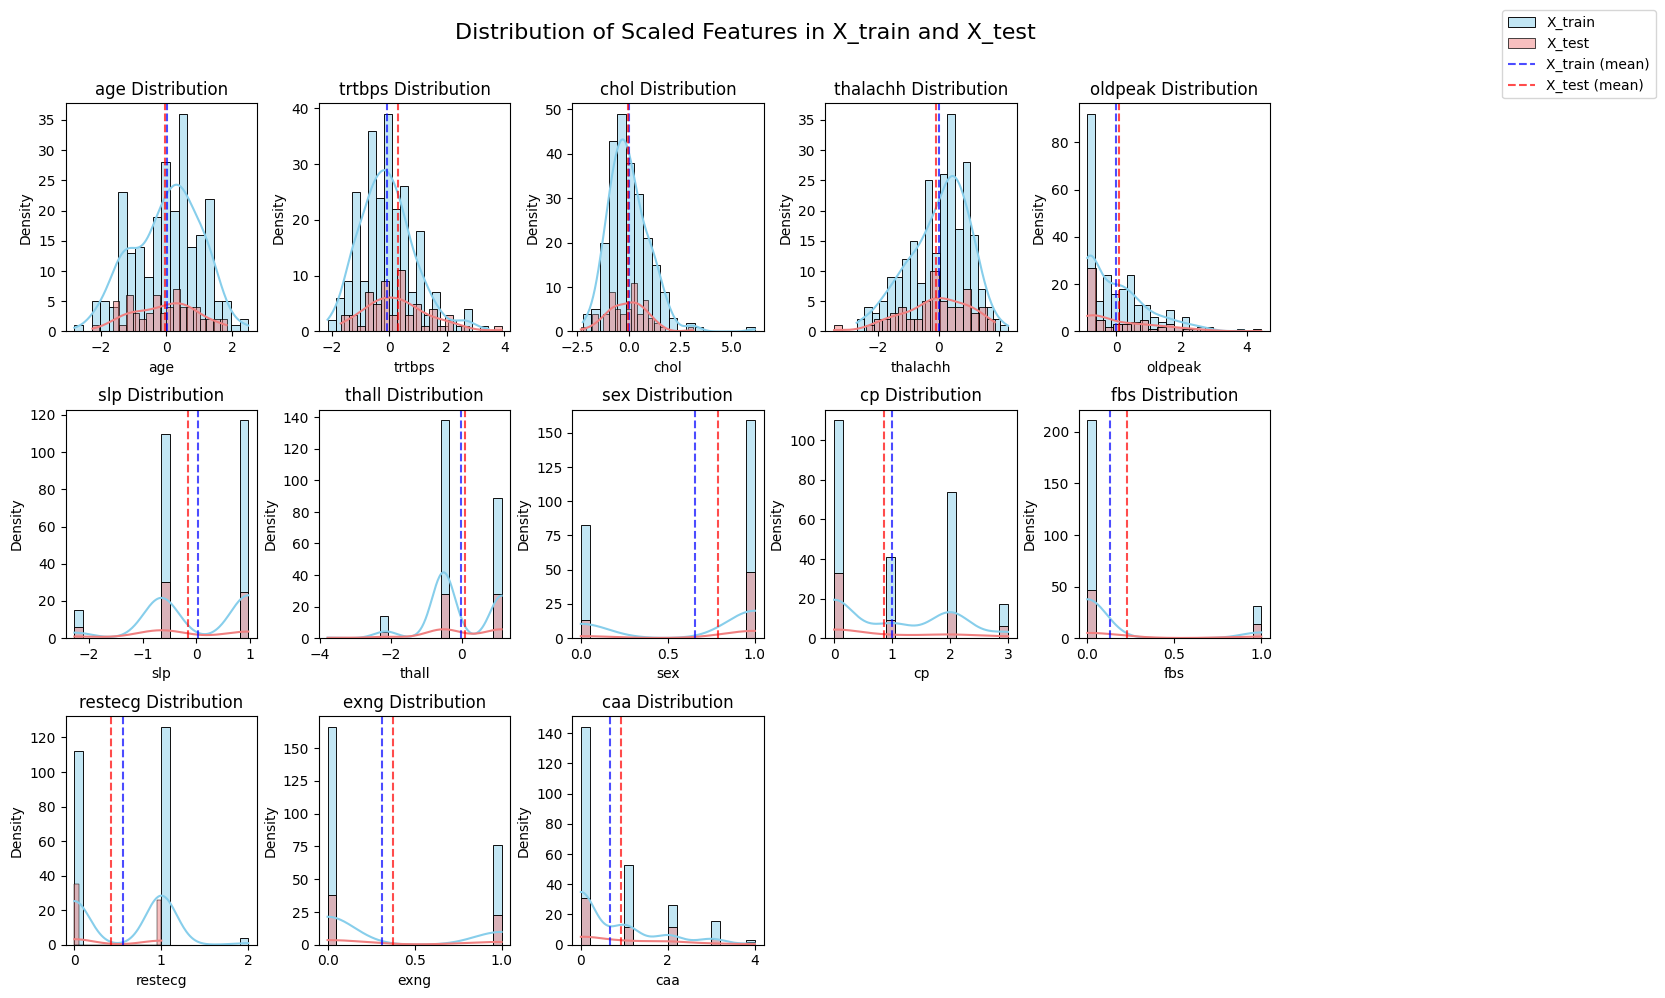

In [126]:
import seaborn as sns

# Extract numerical feature names
cols = X_train.columns

# Create subplots for each feature using Seaborn
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Distribution of Scaled Features in X_train and X_test', fontsize=16)

for i, feature in enumerate(cols):
    row = i // 5
    col = i % 5

    # Plot X_train feature distribution using Seaborn
    sns.histplot(X_train[feature], bins=20, color='skyblue', ax=axs[row, col], label='X_train', kde=True)

    # Plot X_test feature distribution using Seaborn
    sns.histplot(X_test[feature], bins=20, color='lightcoral', ax=axs[row, col], label='X_test', kde=True)

    axs[row, col].set_title(f'{feature} Distribution')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Density')
    
    # Calculate the means for train and test
    mean_train = X_train[feature].mean()
    mean_test = X_test[feature].mean()
    
    # Add vertical lines for the means
    axs[row, col].axvline(mean_train, color='blue', linestyle='--', alpha=0.7)
    axs[row, col].axvline(mean_test, color='red', linestyle='--', alpha=0.7)

# Create legend with custom handles and labels
handles, labels = axs[0, 0].get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='blue', linestyle='--', alpha=0.7), plt.Line2D([0], [0], color='red', linestyle='--', alpha=0.7)])
labels.extend(['X_train (mean)', 'X_test (mean)'])

# Add the legend to the figure
fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1,1))

# Remove the empty subplots
for i in range(len(cols), 3 * 5):
    fig.delaxes(axs[i // 5, i % 5])

plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)
plt.show()

## Visualize for test_size=0.3 instead of 0.2

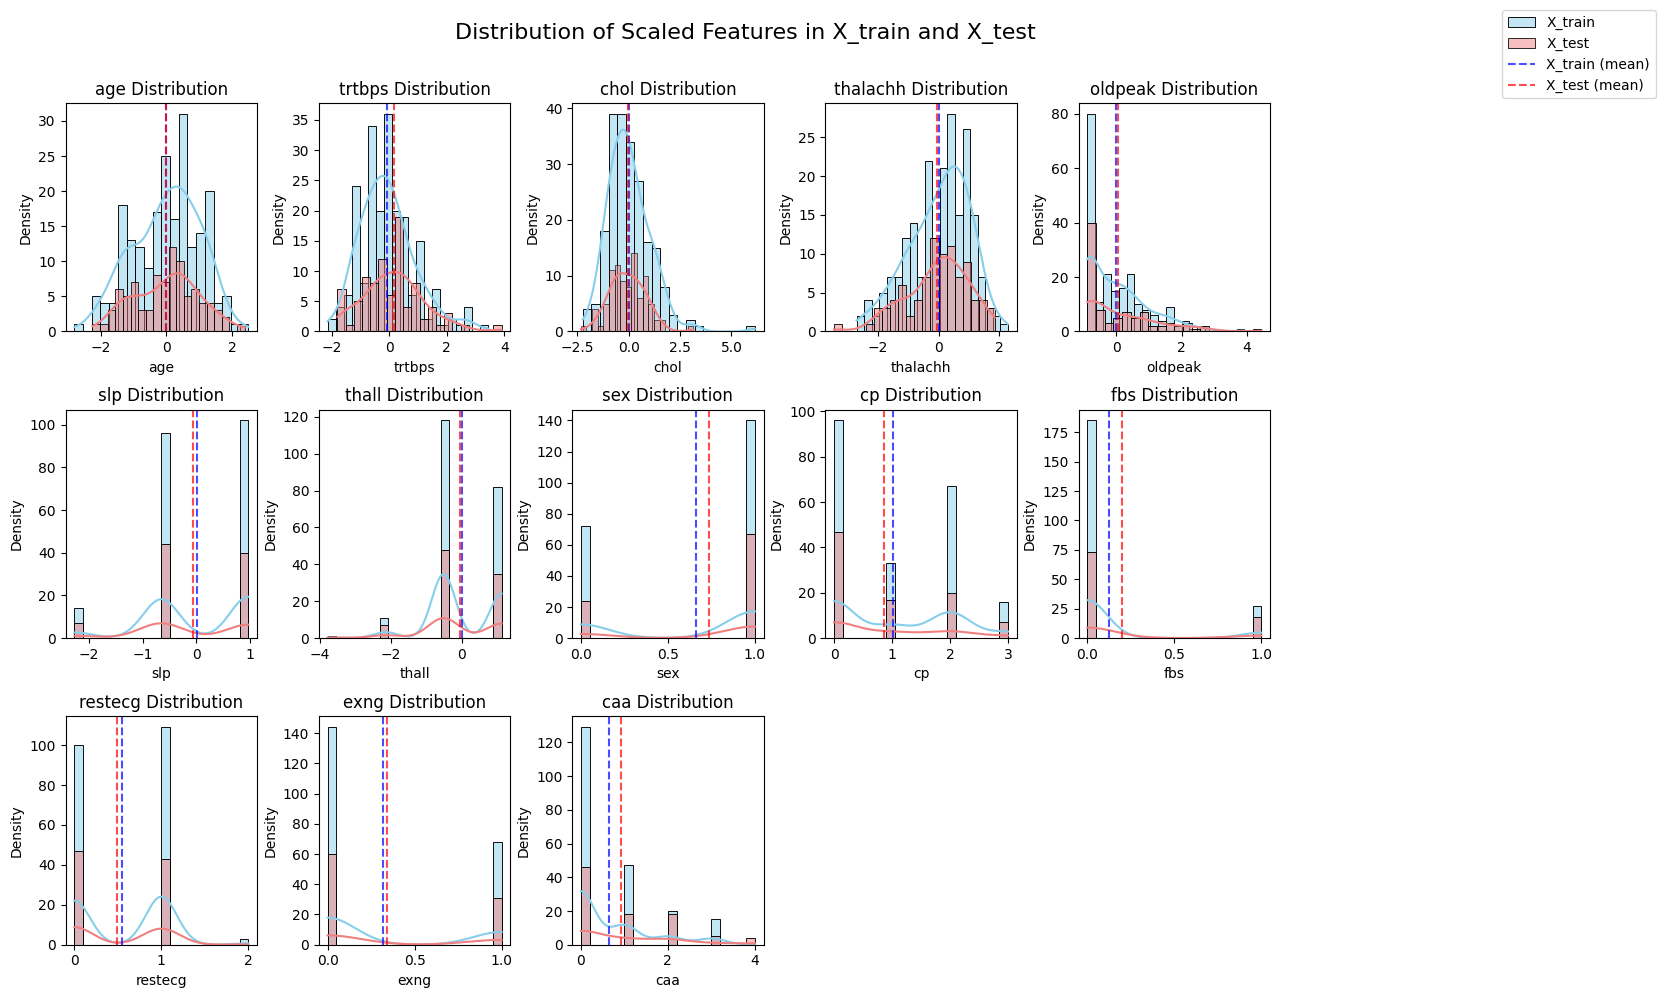

In [124]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Extract numerical feature names
cols = X_train.columns

# Create subplots for each feature using Seaborn
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Distribution of Scaled Features in X_train and X_test', fontsize=16)

for i, feature in enumerate(cols):
    row = i // 5
    col = i % 5

    # Plot X_train feature distribution using Seaborn
    sns.histplot(X_train[feature], bins=20, color='skyblue', ax=axs[row, col], label='X_train', kde=True)

    # Plot X_test feature distribution using Seaborn
    sns.histplot(X_test[feature], bins=20, color='lightcoral', ax=axs[row, col], label='X_test', kde=True)

    axs[row, col].set_title(f'{feature} Distribution')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Density')
    
    # Calculate the means for train and test
    mean_train = X_train[feature].mean()
    mean_test = X_test[feature].mean()
    
    # Add vertical lines for the means
    axs[row, col].axvline(mean_train, color='blue', linestyle='--', alpha=0.7)
    axs[row, col].axvline(mean_test, color='red', linestyle='--', alpha=0.7)

# Create legend with custom handles and labels
handles, labels = axs[0, 0].get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='blue', linestyle='--', alpha=0.7), plt.Line2D([0], [0], color='red', linestyle='--', alpha=0.7)])
labels.extend(['X_train (mean)', 'X_test (mean)'])

# Add the legend to the figure
fig.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1,1))

# Remove the empty subplots
for i in range(len(cols), 3 * 5):
    fig.delaxes(axs[i // 5, i % 5])

plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)
plt.show()

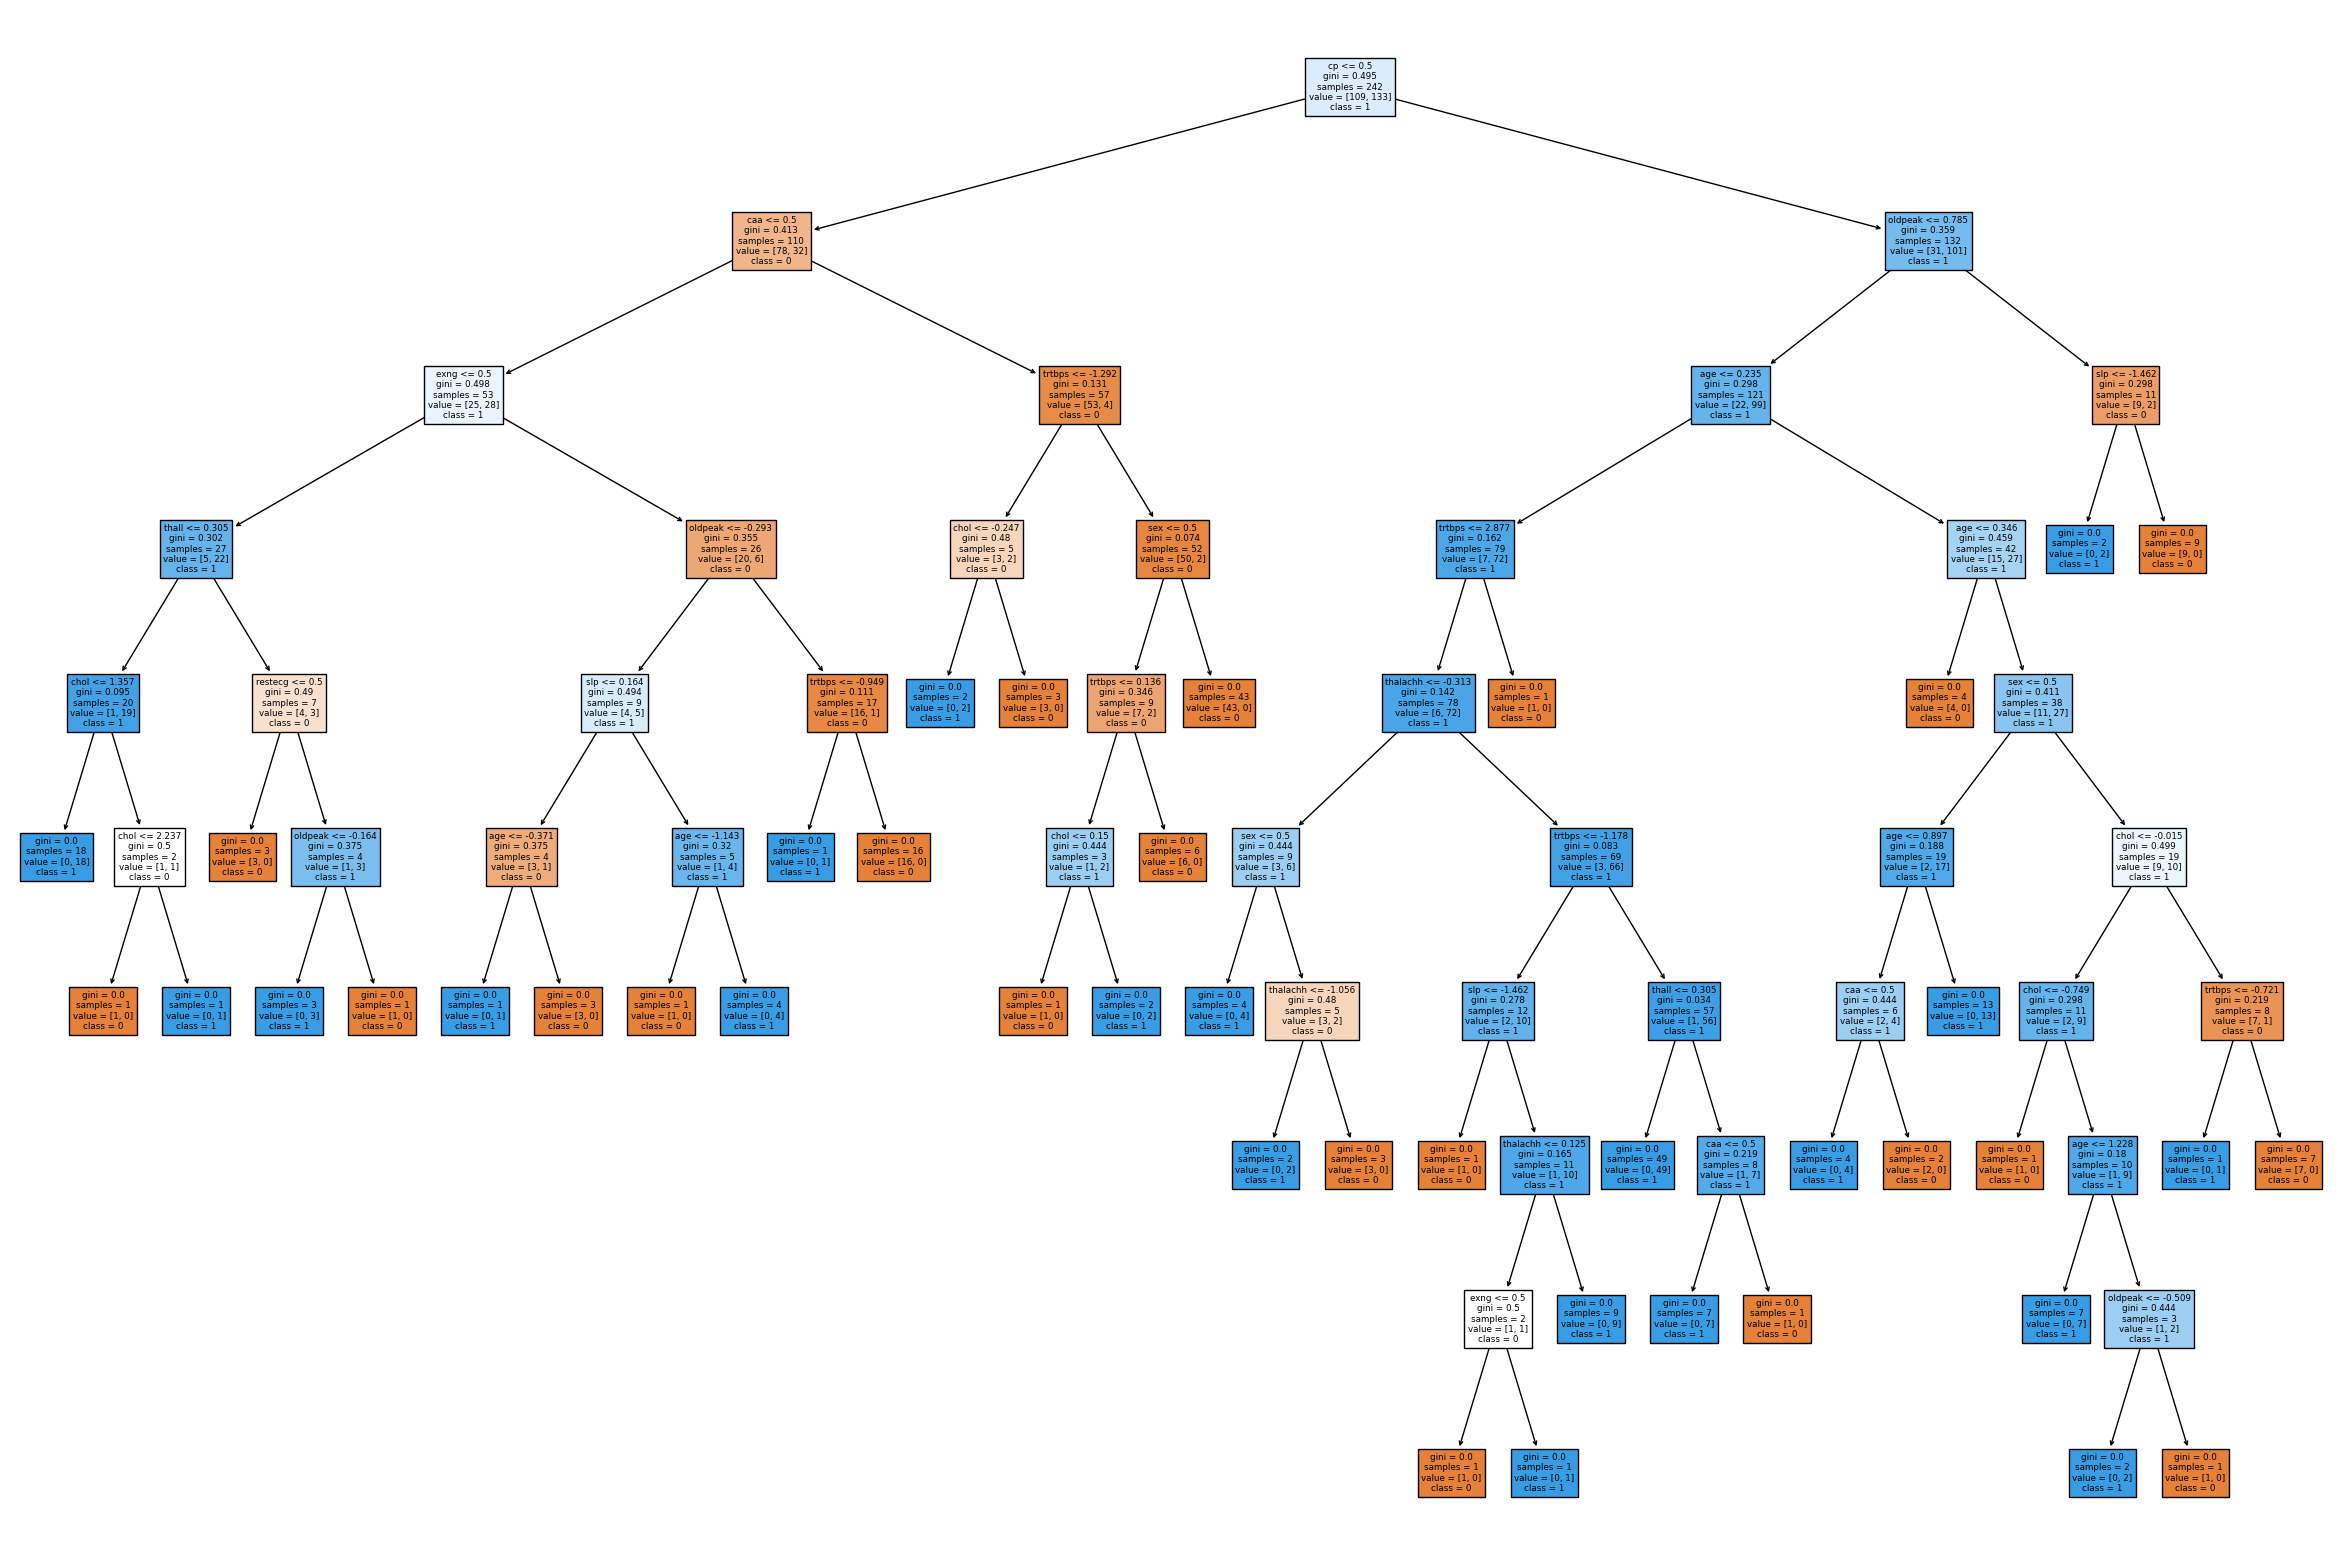

In [129]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Assuming your decision tree model is dt
plt.figure(figsize=(30,20))  # Set the figure size
tree.plot_tree(dt, 
               feature_names = X_train.columns,  # use your dataframe's column names here
               class_names=['0','1'],  # assuming your target variable is binary. Change as needed
               filled = True)
plt.show()

In [130]:
# Predicting on Test Data
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report: \n", class_report)

Accuracy:  0.819672131147541
Confusion Matrix: 
 [[25  4]
 [ 7 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

